In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_excel("C:/Users/dell 3400/Documents/Rihanpro.xlsx")
df=pd.DataFrame(data)
#df.drop(['Status','unnamed1'],axis=1,inplace=True)  
#drop unusable column from data frame
print(df)




       User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       O

In [19]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)  
#drop unusable column from data frame

In [20]:
#count null of a single column
print(df["User_ID"].isnull().sum())
df.head(5)
#count null from complete dataset
df.isnull().sum()


0


User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [25]:
df.shape

(11239, 13)

In [27]:
df.dropna(inplace=True)
df.shape


(11239, 13)

In [22]:
#change data type of a particular column using astype method
df['Amount']=df['Amount'].astype(int)
df['Amount'].dtypes


dtype('int64')

In [28]:
#use describe method with our data
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [31]:
df[['Age','Orders','Amount']].describe()


,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [29]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

#Expolatry Analysis 
-----

GENDER:-
---

In [30]:
gb=df.groupby(['Gender'])['Amount'].sum()
gb

Gender
F    74335853
M    31913276
Name: Amount, dtype: int64

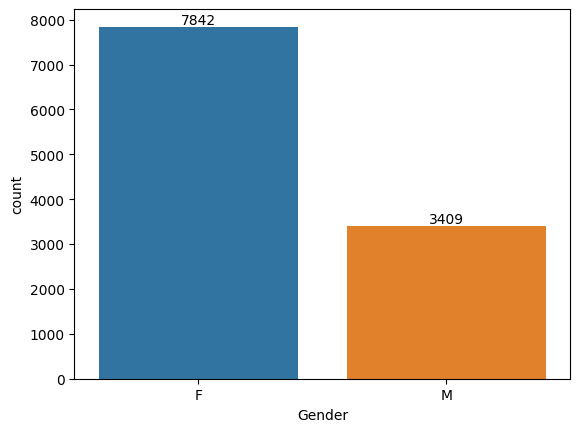

In [3]:
#In for loop we are make a contaner store all under
ax=sns.countplot(data=df,x="Gender",hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

    

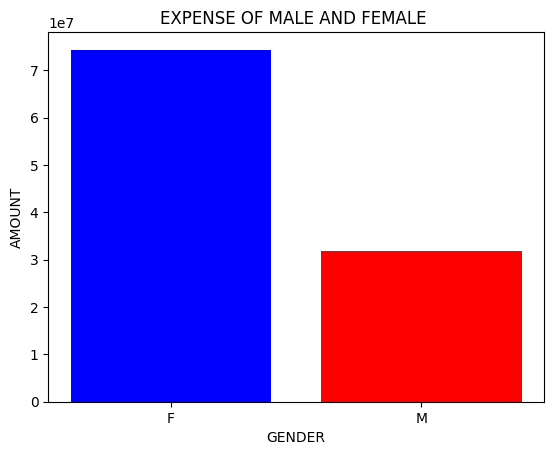

In [55]:
plt.bar(gb.index,gb.values,color=['blue','red'])
plt.xlabel("GENDER")
plt.ylabel("AMOUNT")
plt.title('EXPENSES OF MALE AND FEMALE ')
plt.show()

From the above graph we can see that most of the byers is females.
So we san say that purchasing power of women is  greater as compare to men


In [32]:
df.info


<bound method DataFrame.info of        User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

       

AGE:-
---


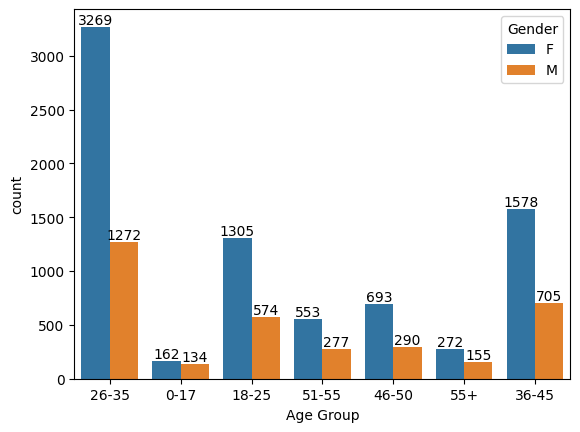

In [7]:
ax=sns.countplot(x='Age Group',data=df,hue="Gender")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


  Age Group    Amount
2     26-35  42613442
3     36-45  22144994
1     18-25  17240732
4     46-50   9207844
5     51-55   8261477
6       55+   4080987
0      0-17   2699653


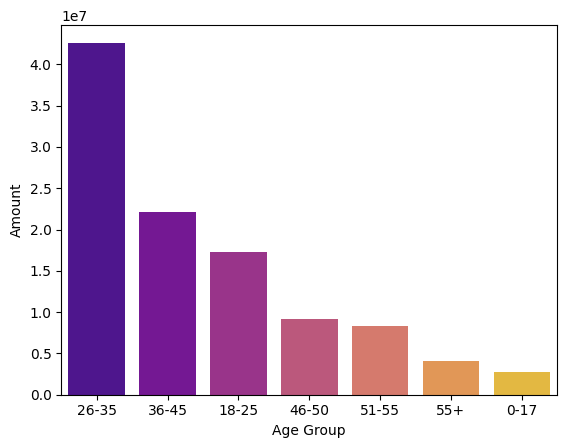

In [35]:
#Group by sum of amount according to the age group
gb3=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=gb3,palette='plasma',hue='Age Group')
print(gb3)

##FROM THE ABOVE GRAPH WE CAN SEE THAT MOST OF THE BYERS ARE FEMALE FROM 26-35 AGE GROUP.


ZONE:-
---

       Zone    Amount
0   Central  41600872
1   Eastern   7049213
2  Northern  12618752
3  Southern  26606667
4   Western  18373625


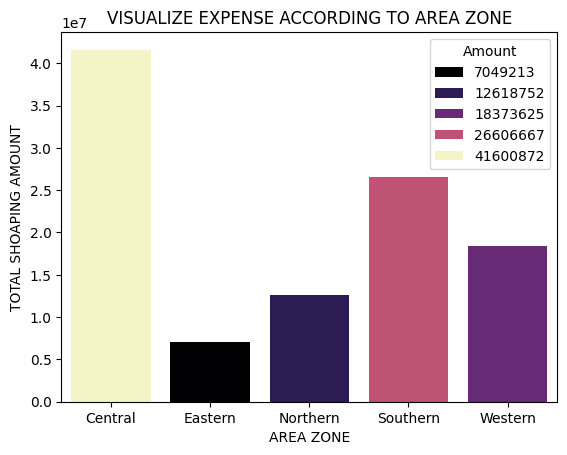

In [34]:
#Group by the sum of amount of sales according to the zone
gb2=df.groupby(['Zone'],as_index=False)['Amount'].sum()
print(gb2)
sns.barplot(data=gb2,x='Zone',y='Amount',palette='magma',hue='Amount')
plt.xlabel("AREA ZONE")
plt.ylabel("TOTAL SHOAPING AMOUNT")
plt.title("VISUALIZE EXPENSE ACCORDING TO AREA ZONE")
plt.show()

FORM ABOVE GRAPH WE CAN SEE THAT THE HIGHEST SALE OF PRODUCT IN CENTRAL ZONE

In [38]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

STATE
---

In [38]:
#groupby count of sales orders according to state
gb4=df.groupby(['State'],as_index=False)['Orders'].count().sort_values(by='Orders',ascending=False)
gb4

,State,Orders
14,Uttar Pradesh,1944
10,Maharashtra,1525
7,Karnataka,1304
2,Delhi,1104
9,Madhya Pradesh,921
0,Andhra Pradesh,811
5,Himachal Pradesh,608
8,Kerala,453
4,Haryana,452
1,Bihar,434


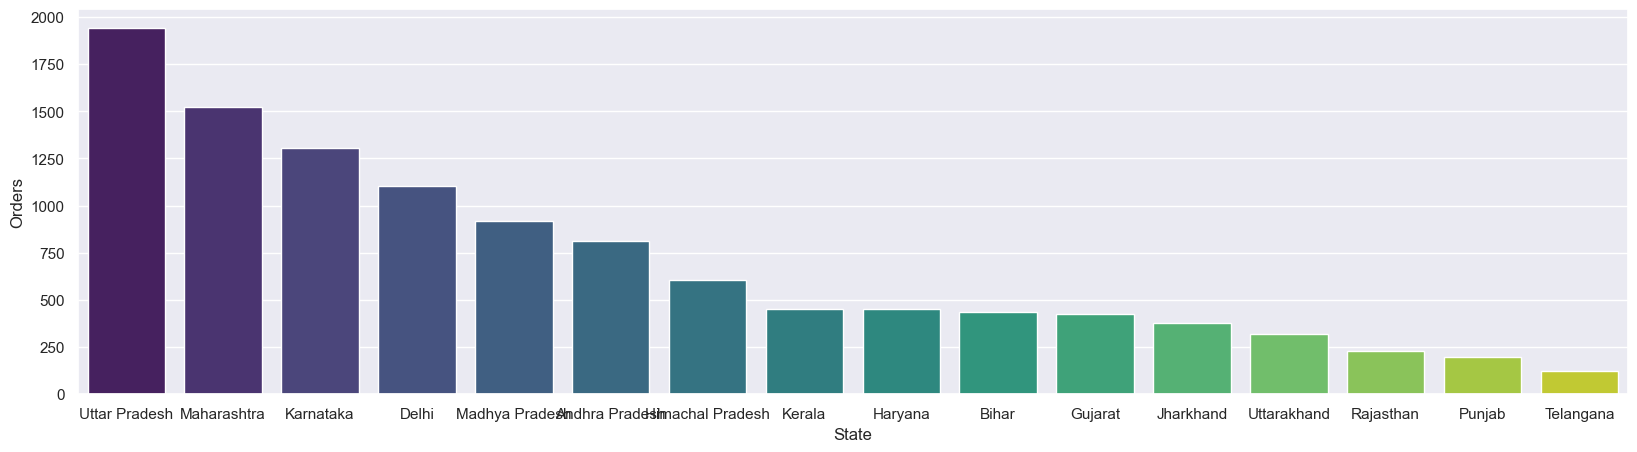

In [41]:
#show the oreders according to the state

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=gb4,x='State',y='Orders',palette='viridis',hue='State')
plt.show()


In [47]:
#show the Amount according to the state
gb5=df.groupby(['State'],as_index=False)['Amount'].sum()
gb5


,State,Amount
0,Andhra Pradesh,8037146
1,Bihar,4022757
2,Delhi,11603818
3,Gujarat,3946082
4,Haryana,4220175
5,Himachal Pradesh,4963368
6,Jharkhand,3026456
7,Karnataka,13523540
8,Kerala,3894491
9,Madhya Pradesh,8101142


<Axes: xlabel='State', ylabel='Amount'>

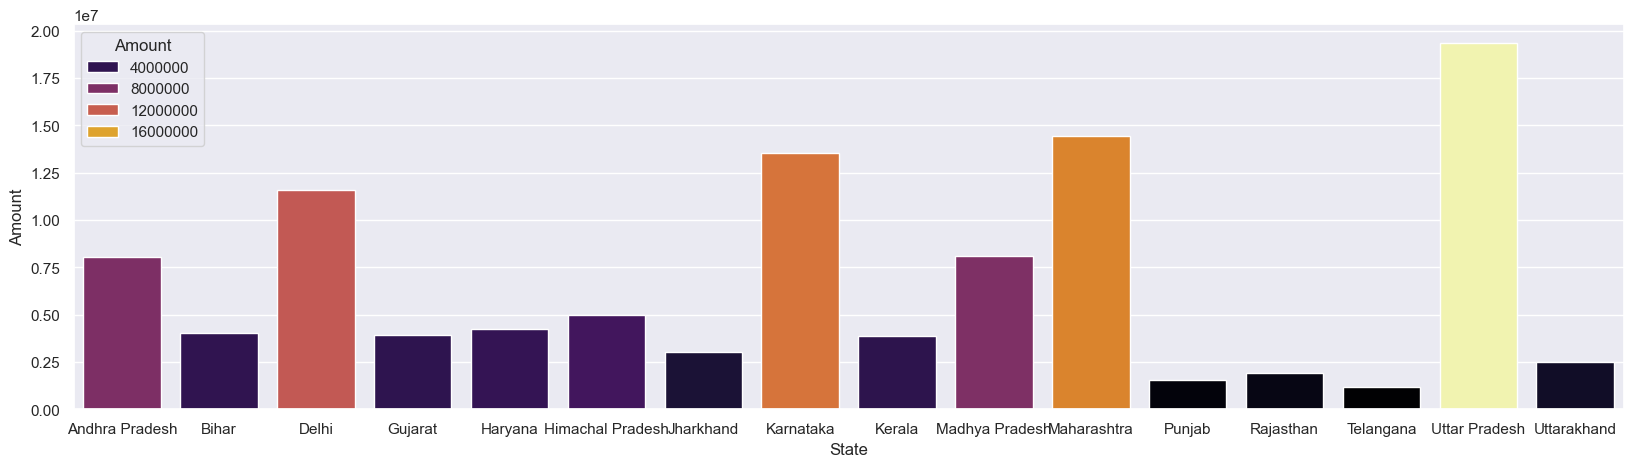

In [48]:
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=gb5,x='State',y='Amount',hue='Amount',palette='inferno')

#FROM ABOVE GRAPHS WE CAN SAY THAT MOST OF THE BYERS IS FROM UTTAR PRADESH,MAHARASTRA AND KARNATKA 

MARITAL STATUS:-
---


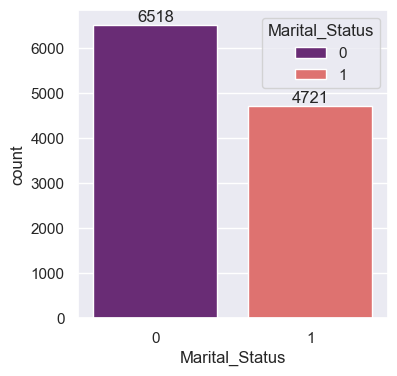

In [50]:
#see the count of people according to  Marital status
sns.set(rc={'figure.figsize':(4,4)})
ax=sns.countplot(data=df,x='Marital_Status',palette="magma",hue='Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)

In [54]:
#see the sum of Amount of people according to marital status 
gb6=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum()
gb6

,Marital_Status,Gender,Amount
0,0,F,43786646
1,0,M,18338738
2,1,F,30549207
3,1,M,13574538


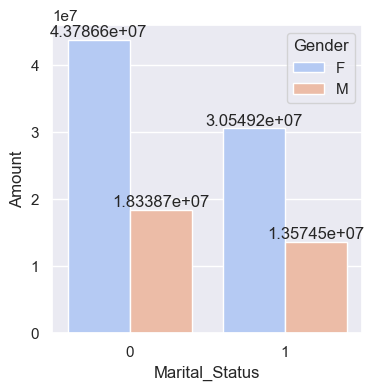

In [62]:
ax=sns.barplot(data=gb6,x='Marital_Status',y='Amount',hue='Gender',palette='coolwarm')
for i in ax.containers:
    ax.bar_label(i)

from the above graph we can see that most of the byers is unmarried and female  

Occupation:-
----

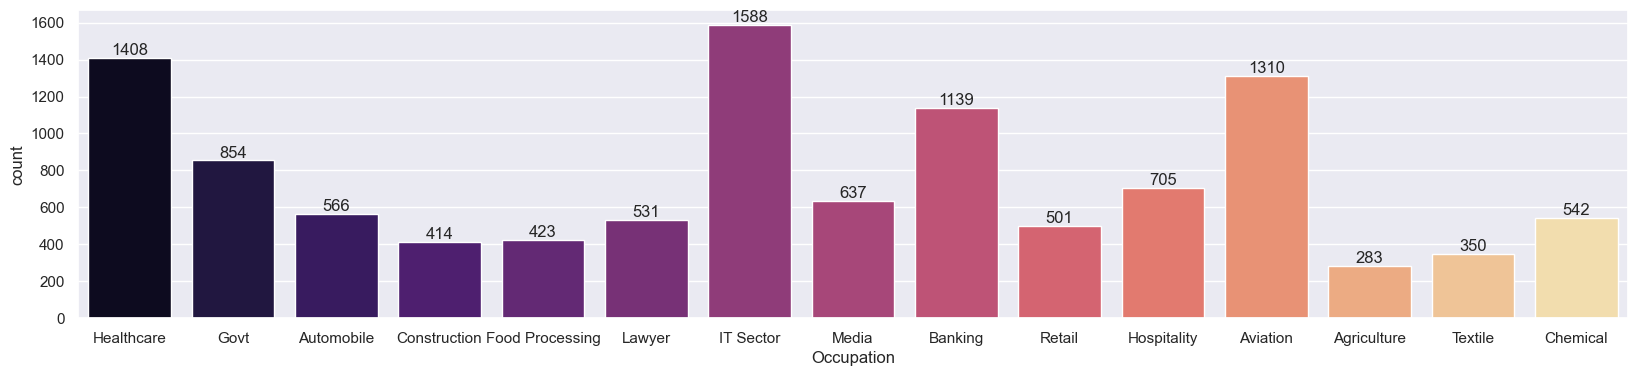

In [3]:
sns.set(rc={'figure.figsize':(20,4)})
ax=sns.countplot(data=df,x='Occupation',palette="magma",hue='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

From above graphs we can see the most of the product is purchased IT sector occupation people

In [23]:
gb7=df.groupby(['Product_ID'],as_index=False)['Orders'].sum()
gb7

,Product_ID,Orders
0,P00000142,57
1,P00000242,15
2,P00000342,16
3,P00000442,1
4,P00000542,6
...,...,...
2346,P0099042,19
2347,P0099242,19
2348,P0099342,25
2349,P0099442,10


conclusion :- Marrried women age 26-35 yrs from UP,Maharastra and working in IT,Healthcare and aviatioin more likely to buy product from food clothing and electronic catery

Author :-RIHAN ALI

-------
THANK YOU
-
